In [54]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("../../country_vaccinations.csv")

In [13]:
max_idx = df['daily_vaccinations'].idxmax()
min_idx = df['daily_vaccinations'].idxmin()
print(f"가장 많이 접종된 날: {df['date'][max_idx]}, 가장 적게 접종된 날: {df['date'][min_idx]}")

가장 많이 접종된 날: 2021-06-28, 가장 적게 접종된 날: 2021-01-28


In [39]:
vacc_dict = {}

for i, row in df.iterrows():
    vaccines = row['vaccines']
    country = row['country']

    vacc_splited = [v.strip() for v in vaccines.split(",")]

    for v in vacc_splited:
        if v not in vacc_dict.keys():
            vacc_dict[v] = [country]
        elif country not in vacc_dict[v]:
            vacc_dict[v].append(country)

In [59]:
vacc_df = pd.DataFrame(index=[list(vacc_dict.keys())], columns=['접종 국가 수'])
vacc_df['접종 국가 수'] = [len(vacc_dict[key])for key in list(vacc_dict.keys())]
vacc_df = vacc_df.sort_values('접종 국가 수', ascending=False)

In [75]:
vacc_df

,접종 국가 수
Oxford/AstraZeneca,183
Pfizer/BioNTech,158
Sinopharm/Beijing,90
Moderna,90
Johnson&Johnson,89
Sputnik V,58
Sinovac,51
Novavax,11
Covaxin,9
Sputnik Light,8


In [61]:
other_df = vacc_df[vacc_df['접종 국가 수'] < 10]

In [71]:
indexes = [index[0] for index in list(other_df.index)]

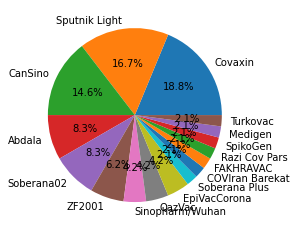

In [74]:
plt.pie(other_df['접종 국가 수'], labels=indexes, autopct="%.1f%%")
plt.show()